Naman Raiyani

60009220057

D2-1

IPCV Exp 3

Import Libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Resize the Images

In [ ]:
def read_and_resize(image_path, height):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    width = int(img.shape[1] * (height / img.shape[0]))
    return cv2.resize(img, (width, height))

Add Padding around images

In [ ]:
def add_padding(image, padding):
    return cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=[255, 255, 255])

Import and Display original images

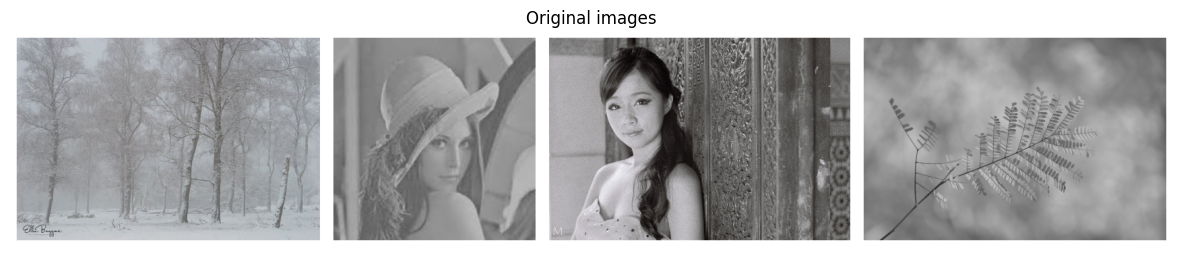

In [ ]:
image_paths = [
    '/content/drive/MyDrive/Colab Notebooks/IPCV/1.jpg',
    '/content/drive/MyDrive/Colab Notebooks/IPCV/2.jpg',
    '/content/drive/MyDrive/Colab Notebooks/IPCV/3.jpg',
    '/content/drive/MyDrive/Colab Notebooks/IPCV/4.jpg'
]

fixed_height = 300
images = [read_and_resize(path, fixed_height) for path in image_paths]

padding = 10
images_with_padding = [add_padding(img, padding) for img in images]

combined_image = np.hstack(images_with_padding)

plt.figure(figsize=(15, 6))
plt.imshow(combined_image, cmap = "gray")
plt.axis('off')
plt.title('Original images')
plt.show()

In [ ]:
def display_images(before, after, titles, type_of_image, values = [], gray = False):
    fig, axs = plt.subplots(2, len(before), figsize=(15, 6))
    for i in range(len(before)):
        if gray:
          axs[0, i].imshow(before[i], cmap = "gray")
        else:
          axs[0, i].imshow(before[i])
        axs[0, i].set_title(titles[i] + ' - Original')
        axs[0, i].axis('off')
        if gray :
          axs[1, i].imshow(after[i], cmap = "gray")
        else:
          axs[1, i].imshow(after[i])
        if values:
            axs[1, i].set_title(type_of_image + ' Gamma=' + str(values[i]))
        else:
            axs[1, i].set_title(titles[i] + ' - ' + type_of_image)
        axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()

Contrast Stretching

In [ ]:
def contrast_stretching_color(img, r1, s1, r2, s2):
    img = img.astype(np.float32)
    img_stretched = ((img - r1) * (s2 - s1) / (r2 - r1)) + s1
    img_stretched = np.clip(img_stretched, 0, 255)
    return img_stretched.astype(np.uint8)

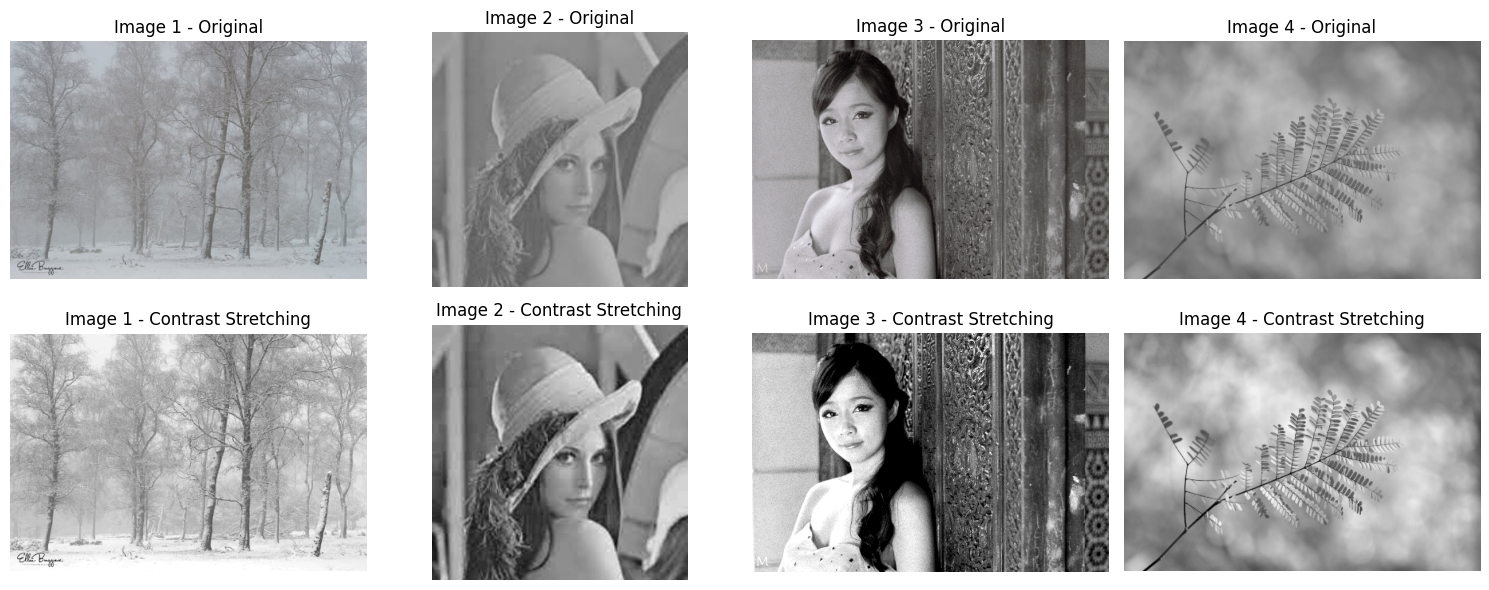

In [ ]:
images_gray = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in images]

r1, s1, r2, s2 = 50, 0, 200, 255
images_contrast_stretched = [contrast_stretching(img, r1, s1, r2, s2) for img in images_gray]

display_images(images, images_contrast_stretched, ['Image 1', 'Image 2', 'Image 3', 'Image 4'], type_of_image = 'Contrast Stretching', gray = True)

Log Transformation

In [ ]:
def log_transformation_color(img, c=25):
    img_log = c * np.log1p(img)
    img_log = np.clip(img_log, 0, 255)
    return img_log.astype(np.uint8)

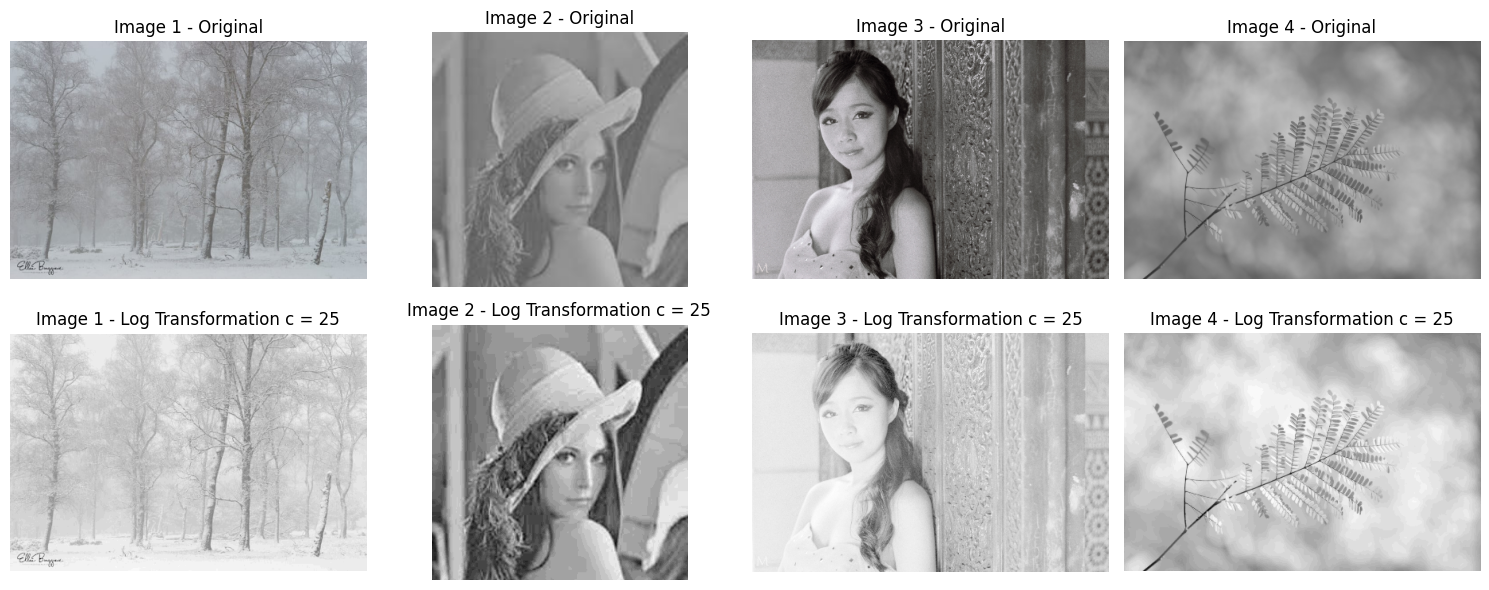

In [ ]:
images_log_transformed = [log_transformation(img) for img in images_gray]

display_images(images, images_log_transformed, ['Image 1', 'Image 2', 'Image 3', 'Image 4'], type_of_image = 'Log Transformation c = 25', gray = True)

Power Law Transformation

In [ ]:
def normalize_color(img):
    img_norm = 255 * (img - np.min(img)) / (np.max(img) - np.min(img))
    return img_norm.astype(np.uint8)

def gamma_correction_color(img, c=1.0, gamma=1.0):
    img_gamma_corrected = c * (img / 255.0) ** gamma
    img_gamma_corrected = np.clip(img_gamma_corrected * 255, 0, 255)
    return img_gamma_corrected.astype(np.uint8)

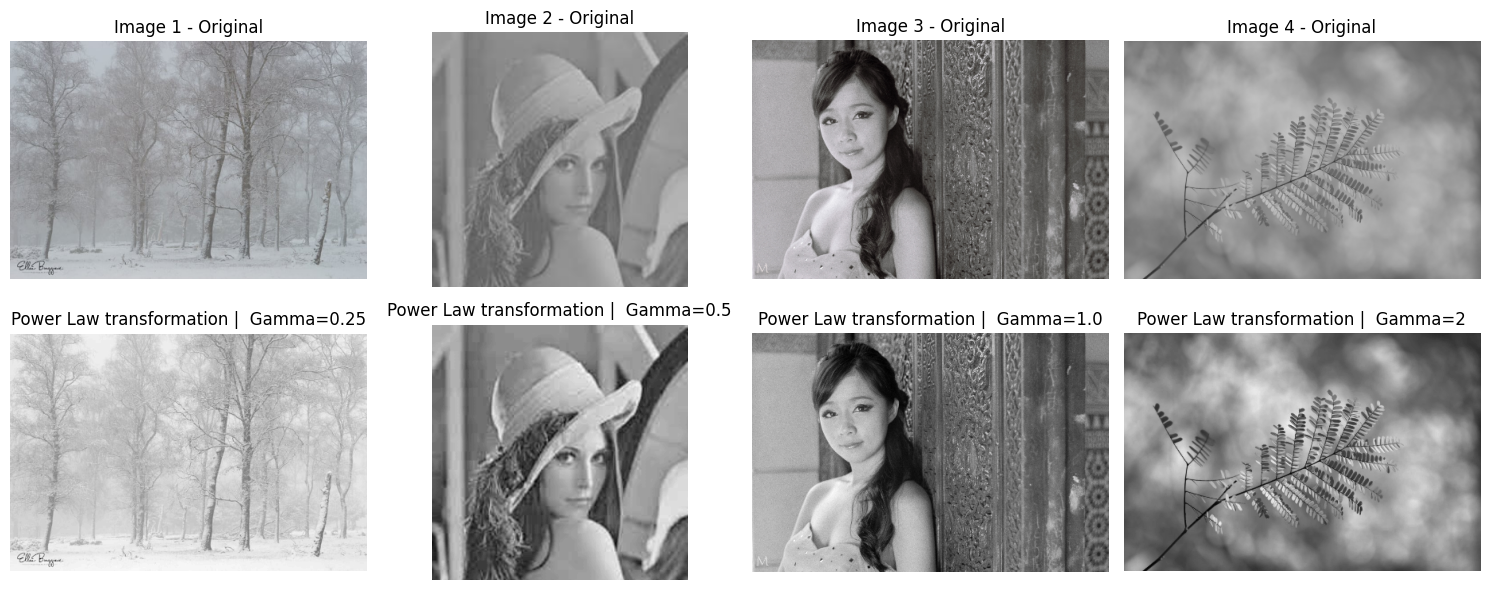

In [ ]:
images_normalized = [normalize(img) for img in images_gray]
c = 1.0
gamma_values = [0.25, 0.5, 1.0, 2]
images_gamma_corrected = [gamma_correction(img, c, gamma) for img, gamma in zip(images_gray, gamma_values)]

display_images(images, images_gamma_corrected, ['Image 1', 'Image 2', 'Image 3', 'Image 4'], type_of_image = 'Power Law transformation | ', values = gamma_values, gray = True)

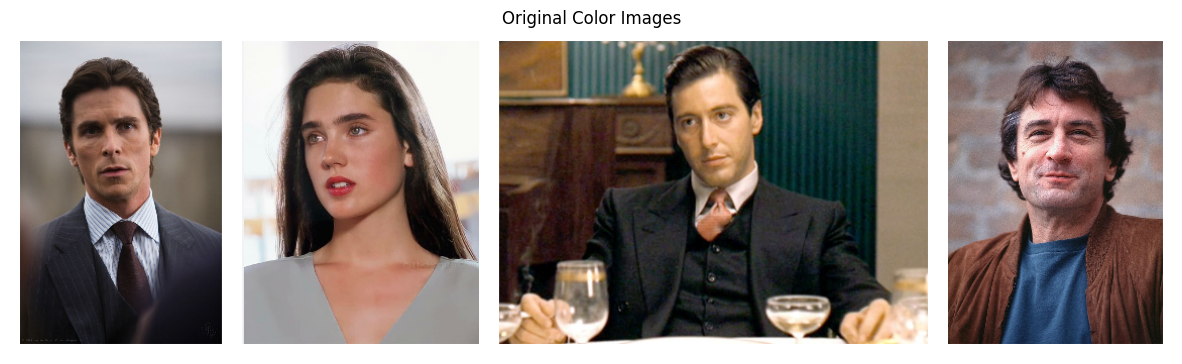

In [ ]:
image_paths_color = [
    '/content/drive/MyDrive/Colab Notebooks/IPCV/5.jpg',
    '/content/drive/MyDrive/Colab Notebooks/IPCV/6.jpg',
    '/content/drive/MyDrive/Colab Notebooks/IPCV/7.jpg',
    '/content/drive/MyDrive/Colab Notebooks/IPCV/8.jpg'
]

fixed_height = 300
images_color = [read_and_resize(path, fixed_height) for path in image_paths_color]
padding = 10
images_with_padding_color = [add_padding(img, padding) for img in images_color]
combined_image_color = np.hstack(images_with_padding_color)
plt.figure(figsize=(15, 6))
plt.imshow(combined_image_color)
plt.axis('off')
plt.title('Original Color Images')
plt.show()

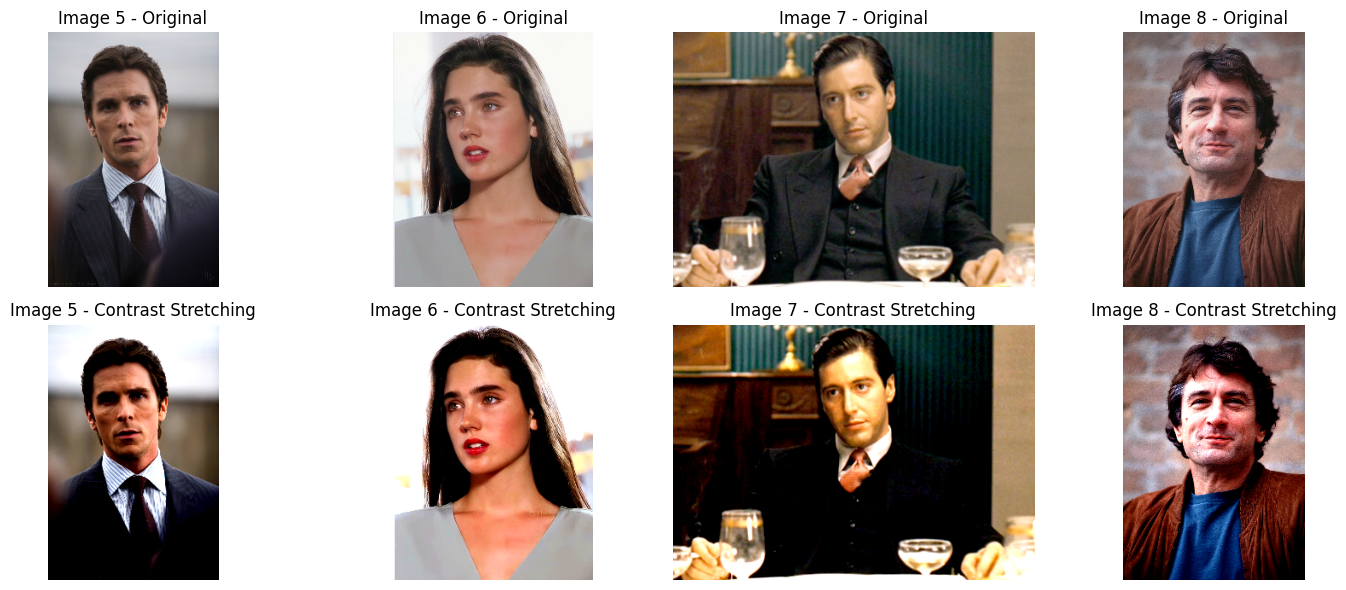

In [ ]:
r1, s1, r2, s2 = 50, 0, 200, 255
images_contrast_stretched_color = [contrast_stretching_color(img, r1, s1, r2, s2) for img in images_color]
display_images(images_color, images_contrast_stretched_color, ['Image 5', 'Image 6', 'Image 7', 'Image 8'], type_of_image='Contrast Stretching')

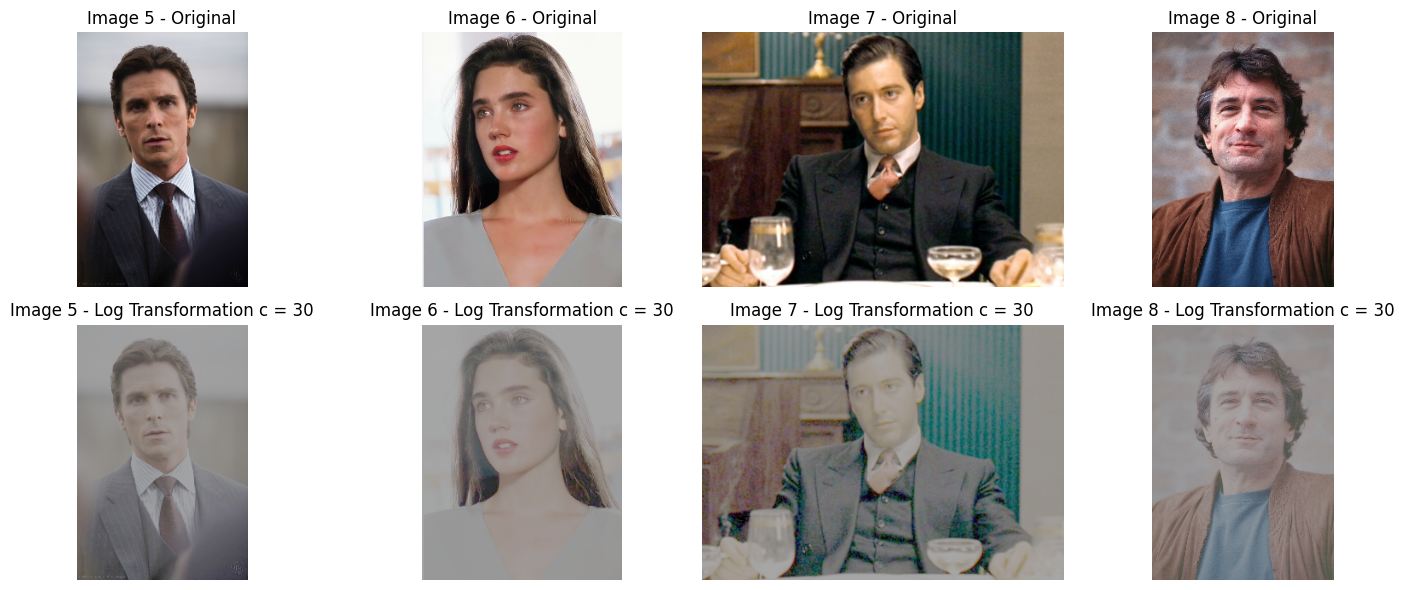

In [ ]:
images_log_transformed_color = [log_transformation_color(img, c = 30) for img in images_color]
display_images(images_color, images_log_transformed_color, ['Image 5', 'Image 6', 'Image 7', 'Image 8'], type_of_image='Log Transformation c = 30')

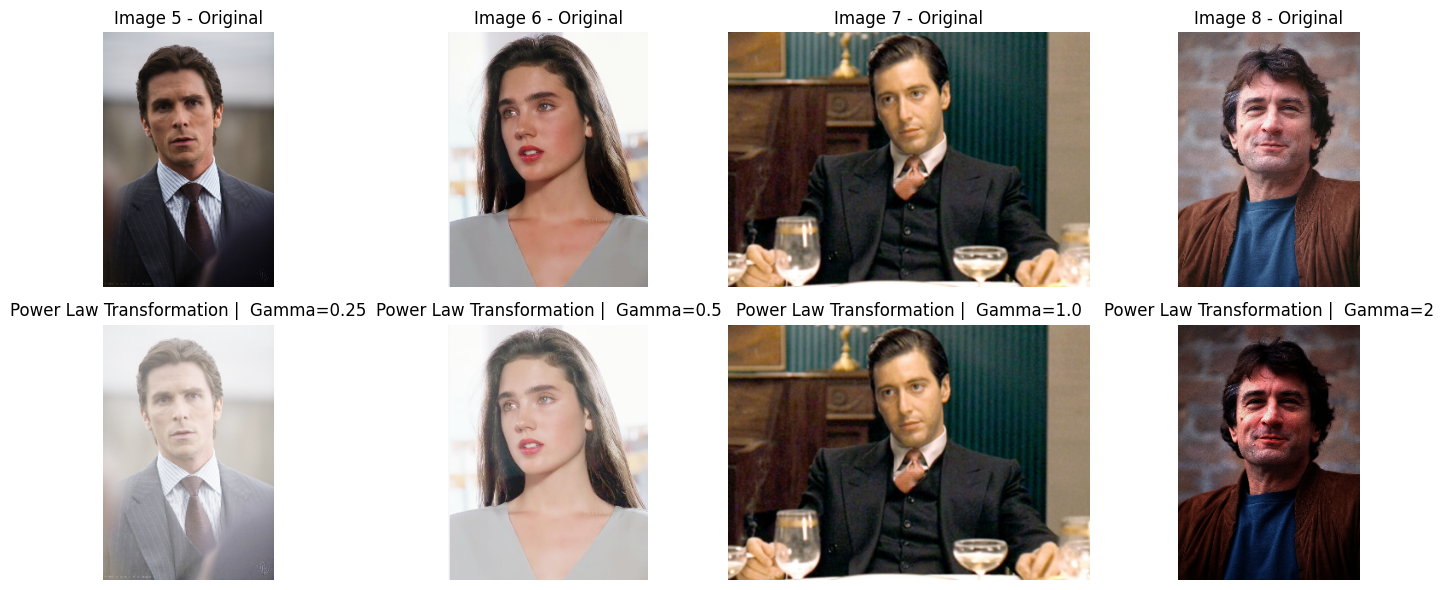

In [ ]:
images_normalized_color = [normalize_color(img) for img in images_color]

c = 1.0
gamma_values_color = [0.25, 0.5, 1.0, 2]
images_gamma_corrected_color = [gamma_correction_color(img, c, gamma) for img, gamma in zip(images_color, gamma_values_color)]
display_images(images_color, images_gamma_corrected_color, ['Image 5', 'Image 6', 'Image 7', 'Image 8'], type_of_image='Power Law Transformation | ', values=gamma_values_color)

Observation :

Contrast Stretching:

Gray Scale:
Improved image contrast effectively.
Color:
Enhanced color contrast, but might alter color balance.
Log Transformation:

Gray Scale:
Increased image brightness, useful for highlighting details in darker areas.
Color:
Brightened image while potentially reducing color saturation, affecting color balance.
Power Law Transformation:

Gray Scale:
Gamma < 1: Brightened the image.
Gamma > 1: Darkened the image.
Gamma = 1: No change, equivalent to original.
Color:
Similar effects as gray scale: brightness increase for gamma < 1 and decrease for gamma > 1.

Applications
Contrast Stretching:

Image Enhancement: Improves visibility and detail in both gray scale and color images.
Medical Imaging: Enhances contrast in X-rays and MRI scans for better diagnosis.
Log Transformation:

Low-light Enhancement: Makes details more visible in underexposed images.
Astronomy: Enhances faint celestial objects by brightening low-intensity features.
Power Law Transformation:

Image Correction: Adjusts brightness and contrast based on image content, useful for varying lighting conditions.
Artistic Effects: Creates various artistic effects by manipulating gamma values.

Conclusion:

Image processing techniques like contrast stretching, log transformation, and power law transformation are crucial for enhancing visual details and adjusting image characteristics. These methods can improve image visibility, highlight details in dark areas, and correct lighting conditions. However, their effects vary between gray scale and color images, which may impact color balance and overall image quality. Understanding these effects helps in choosing the right technique for specific applications, whether for medical imaging, scientific analysis, or creative work.